In [1]:
import pandas as pd
import numpy as np

### Prepare Dataset

In [2]:
df = pd.read_csv('adult/adult.data', header=None,names=[
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "education-num",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
    "native-country",
    "income"
]
 )

In [3]:
df.head()

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [4]:
df.dropna(inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### drop coloumns

In [6]:
drop_columns = ['capital-gain', 'capital-loss', 'fnlwgt', 'education-num','income']

'''
# Drop unnecessary columns
These columns are dropped as they are not needed as 
they may not contain any sensitive information.
required for the local recoding anonymization process.
'''
df.drop(columns=drop_columns, inplace=True)

In [7]:
# count number of columns
print(f"Number of columns after dropping unnecessary columns: {len(df.columns)}")

Number of columns after dropping unnecessary columns: 10


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   marital-status  32561 non-null  object
 4   occupation      32561 non-null  object
 5   relationship    32561 non-null  object
 6   race            32561 non-null  object
 7   sex             32561 non-null  object
 8   hours-per-week  32561 non-null  int64 
 9   native-country  32561 non-null  object
dtypes: int64(2), object(8)
memory usage: 2.5+ MB


In [9]:
print("Sensitive Attribute - workclass value counts:")
df['workclass'].value_counts()

Sensitive Attribute - workclass value counts:


workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [10]:
# Show the first row where 'workclass' contains '?'
missing_value = df[df['workclass'].str.contains('?', regex=False)]['workclass'].head(1).values[0]
print(f"Missing value representation in 'workclass': {missing_value}")

Missing value representation in 'workclass':  ?


In [11]:
df.replace(missing_value,np.nan,inplace=True)
df.dropna(inplace=True)
df['workclass'].value_counts()



workclass
Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: count, dtype: int64

In [12]:
df['marital-status'].value_counts()

marital-status
Married-civ-spouse       14065
Never-married             9726
Divorced                  4214
Separated                  939
Widowed                    827
Married-spouse-absent      370
Married-AF-spouse           21
Name: count, dtype: int64

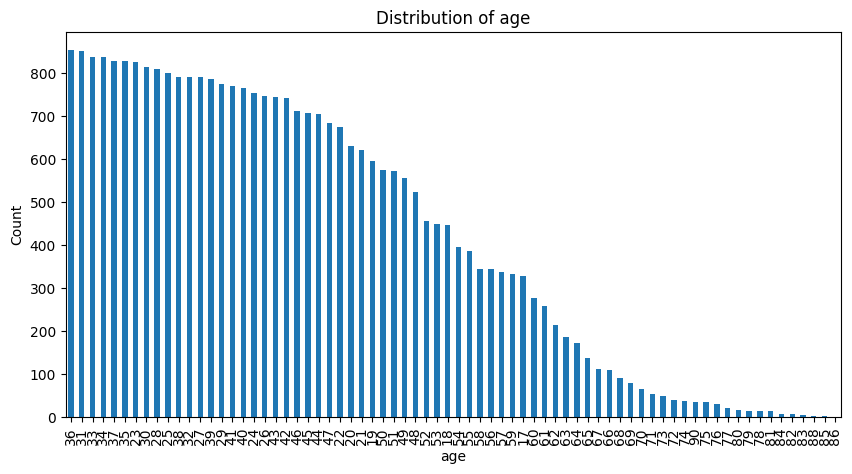

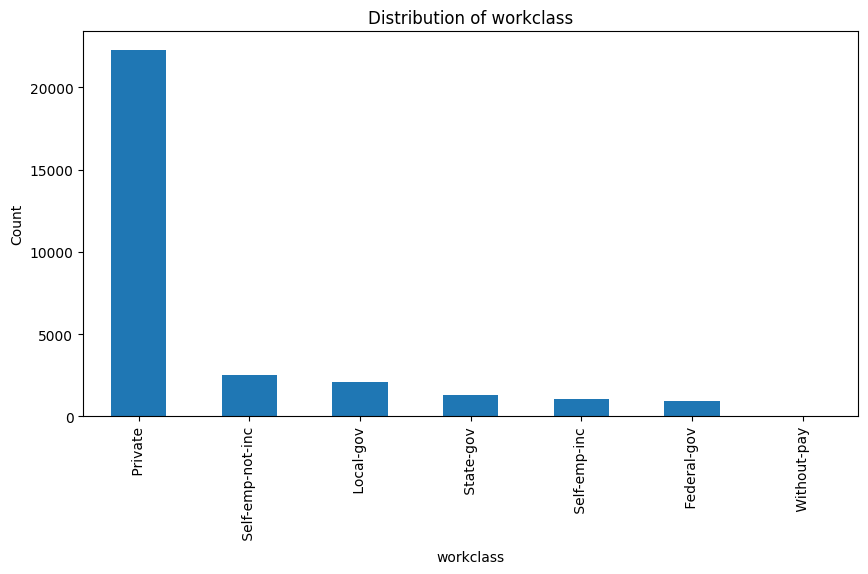

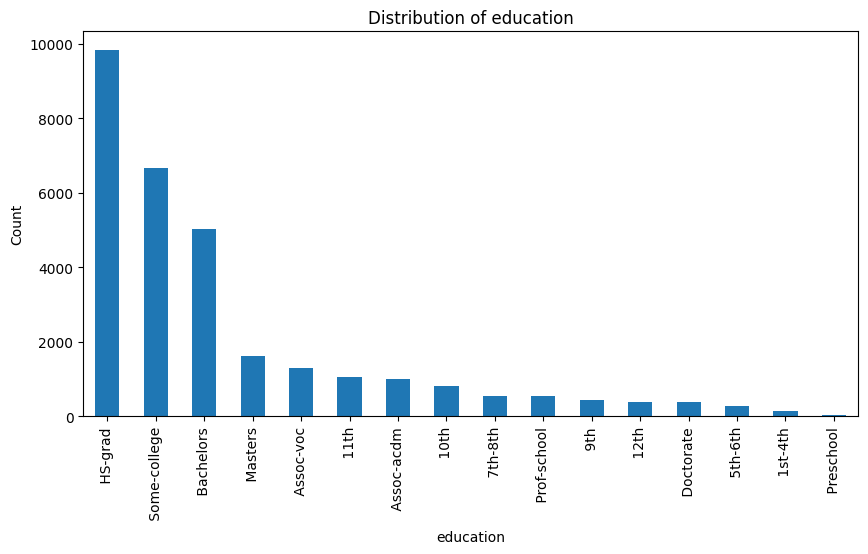

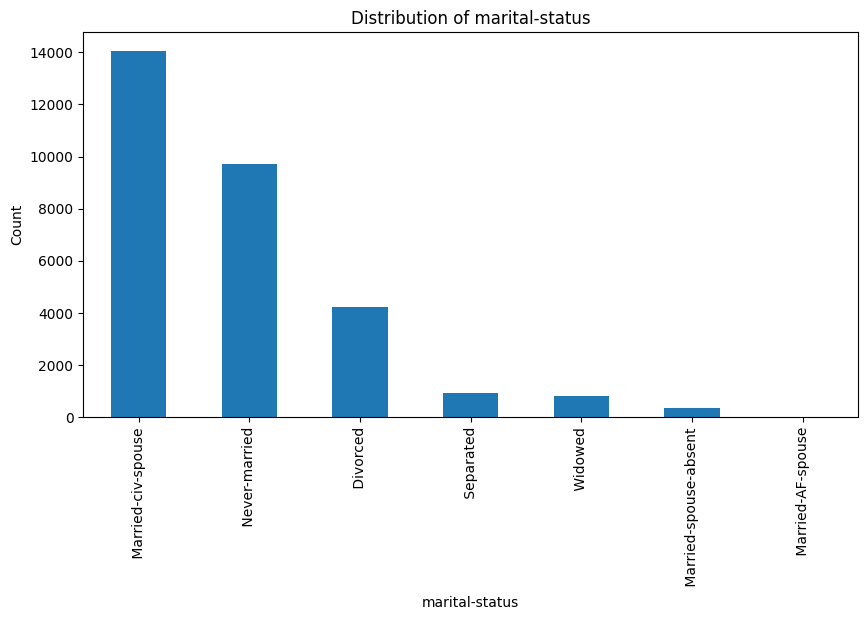

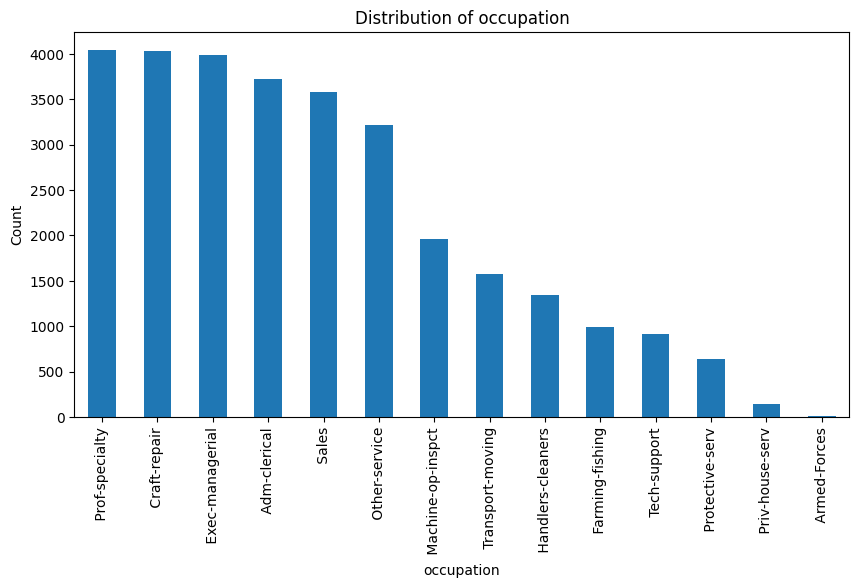

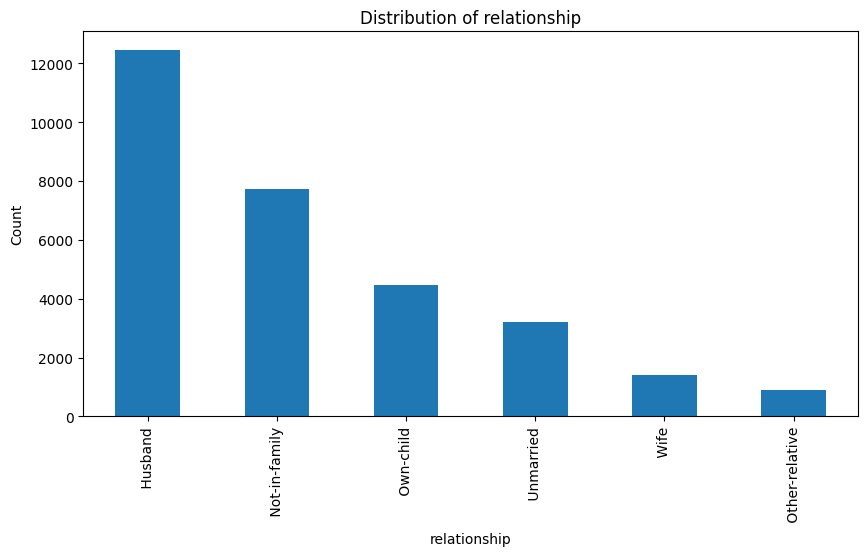

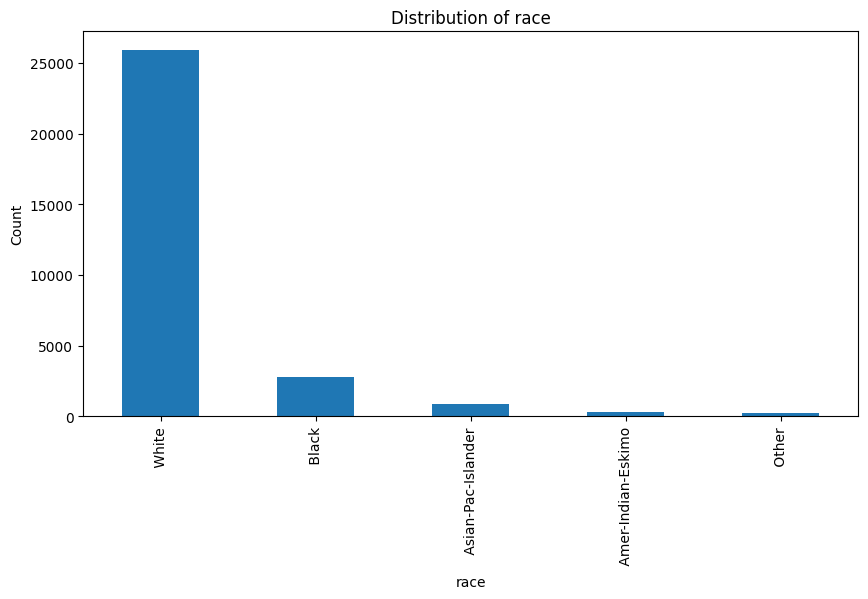

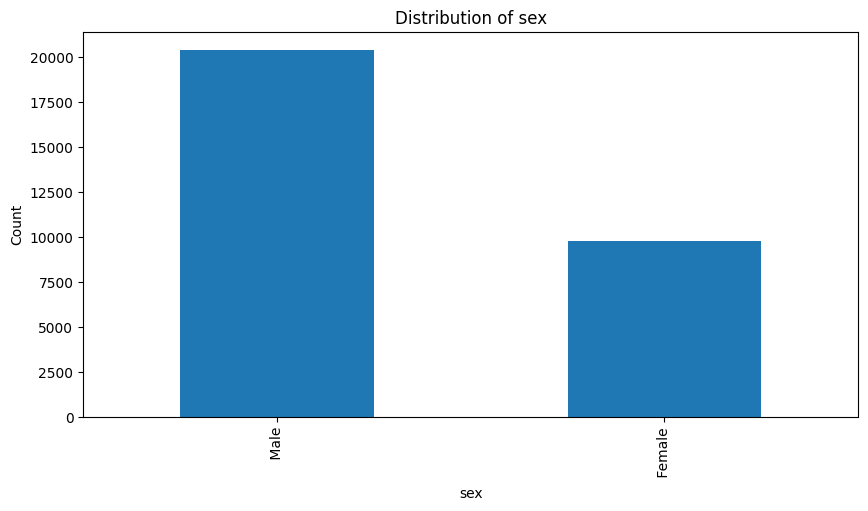

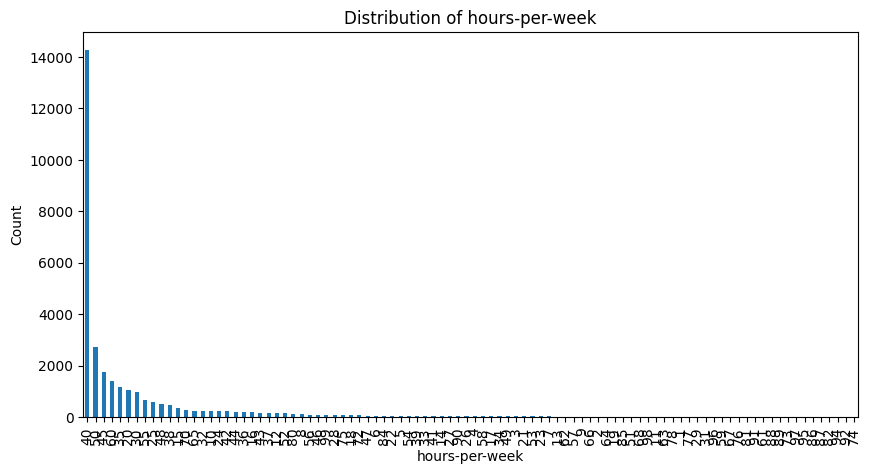

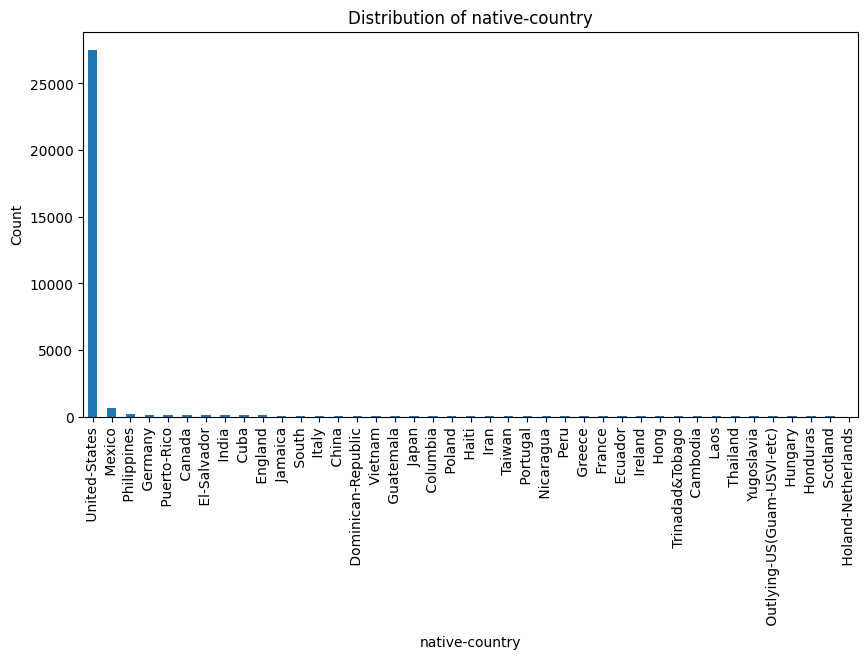

In [13]:
#plot the distribution of every column
import matplotlib.pyplot as plt
for column in df.columns:
    plt.figure(figsize=(10,5))
    df[column].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

# Algorithm 2

In [14]:
#save unqiq values of each column to as a string array
unique_values = {}
for column in df.columns:
    unique_values[column] = df[column].unique().tolist()
    print(f"Unique values in {column}: {unique_values[column]}")


Unique values in age: [39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 34, 25, 43, 40, 54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 47, 46, 36, 79, 27, 18, 33, 76, 55, 61, 70, 64, 71, 66, 51, 58, 26, 17, 60, 90, 75, 65, 77, 62, 63, 67, 74, 72, 69, 68, 73, 81, 78, 88, 80, 84, 83, 85, 82, 86]
Unique values in workclass: [' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov', ' Local-gov', ' Self-emp-inc', ' Without-pay']
Unique values in education: [' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th', ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate', ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool', ' 12th', ' 1st-4th']
Unique values in marital-status: [' Never-married', ' Married-civ-spouse', ' Divorced', ' Married-spouse-absent', ' Separated', ' Married-AF-spouse', ' Widowed']
Unique values in occupation: [' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving', ' F

In [15]:
import json

with open('taxonomy-tree.json', 'r') as f:
    taxonomy_dict = json.load(f)

# Display the dictionary
taxonomy_dict

{'workclass': {'Government': ['Federal-gov', 'State-gov', 'Local-gov'],
  'Self-Employed': ['Self-emp-inc', 'Self-emp-not-inc'],
  'Private Sector': ['Private'],
  'Other': ['Without-pay']},
 'education': {'Preschool': {'Preschool': {'Preschool': ['Preschool']}},
  'Primary': {'Lower Primary': {'1st-4th': ['1st-4th']},
   'Upper Primary': {'5th-6th': ['5th-6th']}},
  'Secondary': {'Junior': {'9th': ['9th'], '10th': ['10th']},
   'Senior': {'11th': ['11th'], '12th': ['12th'], 'HS-grad': ['HS-grad']}},
  'Post-Secondary': {'College': {'Some-college': ['Some-college'],
    'Assoc-acdm': ['Assoc-acdm'],
    'Assoc-voc': ['Assoc-voc']},
   'University': {'Bachelor': ['Bachelors'],
    'Graduate': ['Masters', 'Doctorate', 'Prof-school']}}},
 'marital-status': {'Married': ['Married-civ-spouse',
   'Married-spouse-absent',
   'Married-AF-spouse'],
  'Single': ['Never-married'],
  'Divorced/Separated/Widowed': ['Divorced', 'Separated', 'Widowed']},
 'occupation': {'Management & Administration':

In [16]:
#invert the taxonomy dictionary to get child to parent mapping
def invert_taxonomy_tree(taxonomy, path=[]):
    inverted_taxonomy_tree = {}
    for key in taxonomy:
        
        
        extended_path = [key] + path
        # if(key == "workclass"):
        #     print(taxonomy[key])
        #     print(path)
        # print(f"Current key: {key}, Current path: {path}")
        if isinstance(taxonomy[key], dict):
            result = invert_taxonomy_tree(taxonomy[key], extended_path)
            inverted_taxonomy_tree.update(result)
            # if(key == "workclass"):
            #     print(inverted_taxonomy_tree)
        
        if isinstance(taxonomy[key], list):
            for item in taxonomy[key]:
                inverted_taxonomy_tree[item] = [item] + extended_path

        # path = []
    return inverted_taxonomy_tree

inverted_taxonomy_tree = invert_taxonomy_tree(taxonomy_dict, [])
for key in inverted_taxonomy_tree:
    print(f"{key}: {inverted_taxonomy_tree[key]}")


Federal-gov: ['Federal-gov', 'Government', 'workclass']
State-gov: ['State-gov', 'Government', 'workclass']
Local-gov: ['Local-gov', 'Government', 'workclass']
Self-emp-inc: ['Self-emp-inc', 'Self-Employed', 'workclass']
Self-emp-not-inc: ['Self-emp-not-inc', 'Self-Employed', 'workclass']
Private: ['Private', 'Private Sector', 'workclass']
Without-pay: ['Without-pay', 'Other', 'workclass']
Preschool: ['Preschool', 'Preschool', 'Preschool', 'Preschool', 'education']
1st-4th: ['1st-4th', '1st-4th', 'Lower Primary', 'Primary', 'education']
5th-6th: ['5th-6th', '5th-6th', 'Upper Primary', 'Primary', 'education']
9th: ['9th', '9th', 'Junior', 'Secondary', 'education']
10th: ['10th', '10th', 'Junior', 'Secondary', 'education']
11th: ['11th', '11th', 'Senior', 'Secondary', 'education']
12th: ['12th', '12th', 'Senior', 'Secondary', 'education']
HS-grad: ['HS-grad', 'HS-grad', 'Senior', 'Secondary', 'education']
Some-college: ['Some-college', 'Some-college', 'College', 'Post-Secondary', 'educat

## Provenence Set

In [17]:
def provenance(values):
    result = []
    for value in values:
        mapping = inverted_taxonomy_tree.get(value, None)
        if mapping:
            result = result + mapping[:-1]  # Exclude the original value
    return result


In [18]:
df.head(1).values[0]

array([39, ' State-gov', ' Bachelors', ' Never-married', ' Adm-clerical',
       ' Not-in-family', ' White', ' Male', 40, ' United-States'],
      dtype=object)

In [19]:

first_row = list(df.head(1).values[0])
first_row = [s.strip() for s in first_row if isinstance(s, str)]


In [20]:
provenance(first_row)

['State-gov',
 'Government',
 'Bachelors',
 'Bachelor',
 'University',
 'Post-Secondary',
 'Never-married',
 'Single',
 'Adm-clerical',
 'Management & Administration',
 'Not-in-family',
 'Non-Family',
 'White',
 'Male',
 'United-States',
 'North America']

In [21]:
education_tree = {
        "Secondary": {
            "Junior": ["9th", "10th"],
            "Senior": ["11th", "12th"]
        },
        "University": {
            "Bachelor": ["Bachelor"],
            "Graduate": ["Master", "Doctorate"]
        }
}

# education_tree = {
#     "Any_Education": ["hello"]
# }


## Algorith 2 characteristic_vector_converting

In [22]:
def characteristic_vector_converting(taxonomy_tree, values, inverted_taxonomy_tree):
    characteristic_vector = []
    # print(f"Values to process for characteristic vector: {values}")
    for val in values:
        # print(f"Processing value: {val}")
        last_value = inverted_taxonomy_tree[val][-1]
        # print(f"Processing value: {val}, Last value in taxonomy path: {last_value}") 
        # Get the values in the inverted taxonomy tree that have key as the last value
        arr = []
        for k in inverted_taxonomy_tree:
            mapping = inverted_taxonomy_tree[k]
            if mapping and mapping[-1] == last_value:
                arr.append(mapping[:-1])  # Exclude the original value

        arr = np.array(arr)
        # print(arr.shape)
        # print(arr)
        # for each column in arr
        # print(arr.shape[1])
        provenance_set = provenance([val])
        for col in range(len(provenance_set)):  # every column except last column
            # Get the unique values in the column
            coloumn_values = arr[:, col]
            unique_values = np.unique(coloumn_values)
            # print(f"Unique values in column {provenance_set[col]}: {unique_values}")
            # print(f"Value to encode: {unique_values[0]}")
            vector = [0] * len(unique_values)
            # print(val)
            index = np.where(unique_values == provenance_set[col])[0][0]
            # print(f"Index of value {val} in unique values: {index}")
            vector[index] = 1
            characteristic_vector.extend(vector)
            # Do something with the vector
    return characteristic_vector


In [23]:
first_row[-2:]

['Male', 'United-States']

In [24]:
characteristic_vector_converting(taxonomy_dict, first_row, inverted_taxonomy_tree)

[0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1]

# Experiment parameters

In [25]:
import random

In [26]:
# k=??
# theta=??
alpha=2

# Creating set of hash functions (universal use)

In [27]:

# creates set F of hash functions Hash functions in F are in
#  the form of h(x)=(ax+b) mod NPrime, where a and b are
#  random integers, and NPrime is the smallest prime number
#  larger than |U|.

# F is a list of hash functions
# Each hash function h takes an input x (row index in the characteristic vector)
# and outputs a hashed value modulo a large prime number.
# Example: h(x) = (a * x + b) % N_prime

random.seed(42)
def create_hash_fam(num_hashes,U_size):
  def is_prime(n):
    if n<2:
      return False

    for i in range(2,int(n**0.5)+1):
      if n%i==0:
        return False
    return True

  def next_prime(n):
    while not is_prime(n):
      n=n+1
    return n

  N_prime=next_prime(U_size +1)

  F=[]

  for i in range(num_hashes):
    a=random.randint(1,N_prime-1)
    b=random.randint(0,N_prime-1)
    h = lambda x, a=a, b=b, N_prime=N_prime: (a * x + b) % N_prime
    F.append(h)
  return F
F = create_hash_fam(num_hashes=alpha, U_size=U)

NameError: name 'U' is not defined

In [ ]:
#|U| calculation

unique_vals=df.nunique()
U=unique_vals.sum()
print(U)

264


# Algorithm 4

In [ ]:
import random

In [ ]:
from math import inf
def minhash(characteristic_vec,h_ab):
  min_hash=float('inf')
  for i,bit in enumerate(characteristic_vec):
      if bit==1:
        index=h_ab(i+1)
        if index<min_hash:
          min_hash=index

  return min_hash


In [ ]:
# placeholder test


vec1 = random.choices([0, 1], k=U)
vec2 = random.choices([0, 1], k=U)
vec3 = random.choices([0, 1], k=U)

h_ab=F[random.randint(0,len(F)-1)]

min_hash1_val = minhash(vec1,h_ab)
min_hash2_val = minhash(vec2,h_ab)
min_hash3_val=minhash(vec3,h_ab)
print(min_hash1_val, min_hash2_val,min_hash3_val)

4 0 0
